##3a)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# !pip install numdifftools
import numdifftools as ndt

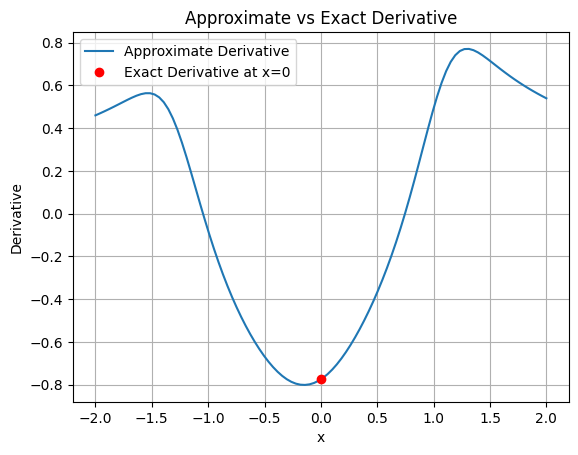

In [ ]:

function = lambda x: np.tanh((x + 1.0) * (x - 0.8) * (x + 0.1))

def finite_difference_derivative(target_function, point):
    return (target_function(point) - target_function(0)) / point

x_values = np.linspace(-2, 2, 100)

first_derivative = ndt.Derivative(function, n=1)

plt.plot(x_values, finite_difference_derivative(function, x_values), label='Approximate Derivative')

plt.plot(0, first_derivative(0), 'ro', label='Exact Derivative at x=0')

plt.xlabel('x')
plt.ylabel('Derivative')
plt.title('Approximate vs Exact Derivative')
plt.legend()
plt.grid(True)

plt.show()


##3b)

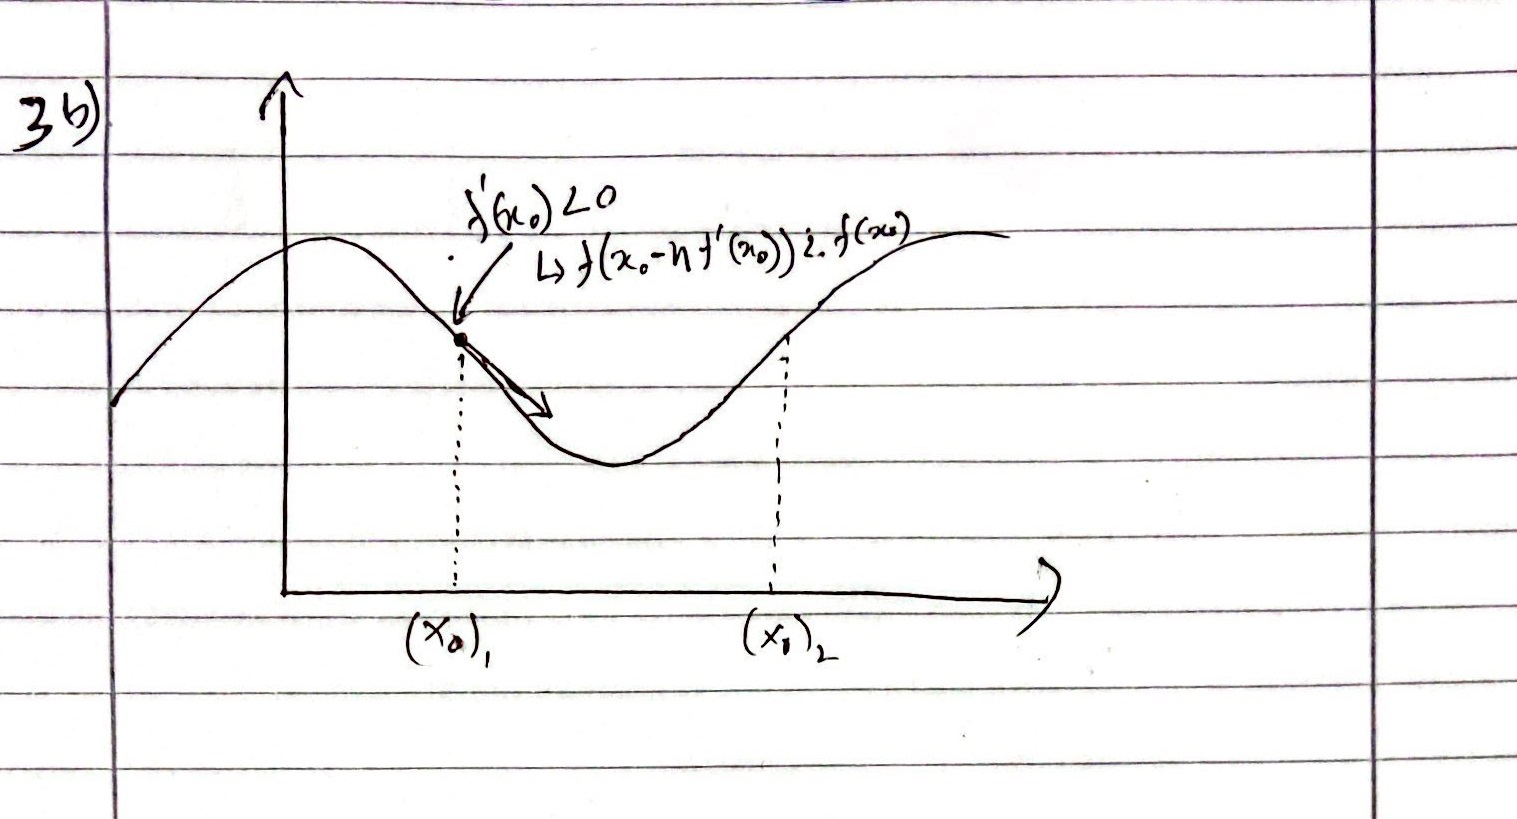

Since $f^′(x_0)$ represents the slope at $x_0$, moving a small distance $𝜂$ in the opposite direction of the slope will decrease the value of $f(x)$ at that point, ensuring $f(x_0) > f(x_0 - 𝜂f^′(x_0))$.

## 3c)

When the step size is zero($\eta$=0), then even if we have computed the gradient (i.e., derivative), we will not be able
to update the x value and inject them again in the function, because the step size is zero and no movement along the computed direction is possible.

let: $\eta = t$ and <br>
$f'$ = first derivative of $f$

then:

$f(x_0) > f(x_0 - t*f'(x_0)$)

when <br>
$t =0,$<br>
$
f(x_0) > f(x_0 - 0)
$
<br>
this leads to:<br>
$
f(x_0) > f(x_0)
$<br>
there is no deviation in the input of $f(x_0)(i.e. x_0)$ , therefore the output $f(x_0)$ will remain the same and the search will stop.

##3d)

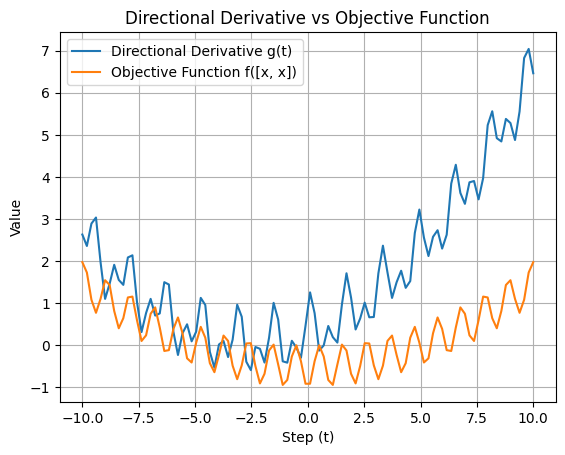

In [6]:
objective_function = lambda x: (1 / 100) * (x[0] ** 2 + x[1] ** 2) - 0.5 * (np.cos(3 * x[0] - 3 * x[1]) + np.cos(3 * x[0] + 3 * x[1]))

gradient_function = ndt.Gradient(objective_function)

target_point = np.array([0.1, 5])

def directional_derivative(step):
    return objective_function(target_point + (step * gradient_function(target_point)))

step_values = np.linspace(-10, 10, 100)

g_values = []
objective_values = []

for step in step_values:
    g_values.append(directional_derivative(step))
    objective_values.append(objective_function([step, step]))

g_values = np.array(g_values)
objective_values = np.array(objective_values)

plt.plot(step_values, g_values, label='Directional Derivative g(t)')
plt.plot(step_values, objective_values, label='Objective Function f([x, x])')

plt.xlabel('Step (t)')
plt.ylabel('Value')
plt.title('Directional Derivative vs Objective Function')
plt.legend()
plt.grid(True)

plt.show()

# Note: g has no flat regions.
# g is the derivative of f, so when f has a local minimum, g has a local maximum.
